<a href="https://colab.research.google.com/github/qlqqqk/Aiffel_prac/blob/main/EXP/%5BE-05%5D/%5BE_05%5D%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_(acc_66_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files,drive
drive.mount('/content/drive')

# # 리눅스 이미지 세팅 명령어 저장
# unzip scissor-samples.zip -d /content/drive/MyDrive/Aiffel/data/rock_scissor_paper/scissor/sam
# unzip scissor_1109.zip -d /content/drive/MyDrive/Aiffel/data/rock_scissor_paper/scissor/j1109
# unzip scissor-moon.zip -d /content/drive/MyDrive/Aiffel/data/rock_scissor_paper/scissor/moon
# unzip real_scissor.zip -d /content/drive/MyDrive/Aiffel/data/rock_scissor_paper/scissor/real
# unzip scissor.zip -d /content/drive/MyDrive/Aiffel/data/rock_scissor_paper/scissor
# rename 's/.jpg/a_*.jpg/' *.jpg
# rename 's/.jpg/sam_*.jpg/' *.jpg
# rename 's/.jpg/m_*.jpg/' *.jpg
# rename 's/.jpg/r_*.jpg/' *.jpg
# cp * /content/drive/MyDrive/Aiffel/data/rock_scissor_paper/scissor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import glob
import tensorflow as tf
from tensorflow import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 64x64 사이즈로 바꾸어 저장합니다.
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
paper_image_dir_path = '/content/drive/MyDrive/Aiffel/data/rock_scissor_paper/paper'
resize_images(paper_image_dir_path)

print("보 이미지 resize 완료!")

1366  images to be resized.
1366  images resized.
보 이미지 resize 완료!


In [ ]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
rock_image_dir_path = '/content/drive/MyDrive/Aiffel/data/rock_scissor_paper/rock'
resize_images(rock_image_dir_path)

print("바위 이미지 resize 완료!")

1371  images to be resized.
1371  images resized.
바위 이미지 resize 완료!


In [ ]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
scissor_image_dir_path = '/content/drive/MyDrive/Aiffel/data/rock_scissor_paper/scissor'
resize_images(scissor_image_dir_path)

print("가위 이미지 resize 완료!")

1371  images to be resized.
1371  images resized.
가위 이미지 resize 완료!


In [ ]:
def load_data(img_path, number_of_data=4108):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.
                    int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/Aiffel/data/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4108 입니다.
x_train shape: (4108, 64, 64, 3)
y_train shape: (4108,)


라벨:  2


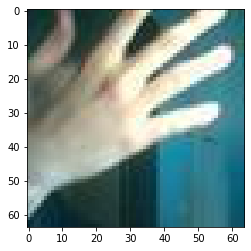

In [ ]:
plt.imshow(x_train[3150])
print('라벨: ', y_train[3150])

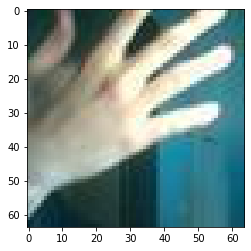

In [ ]:
plt.imshow(x_train_norm[3150])

In [ ]:
x_train.shape

(4113, 64, 64, 3)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [ ]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),padding='same',activation='gelu',input_shape=(64,64,3)))
model.add(keras.layers.Conv2D(16,(3,3),activation='gelu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='gelu'))
model.add(keras.layers.Conv2D(32,(3,3),activation='gelu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='gelu',padding='same'))
model.add(keras.layers.Conv2D(64,(3,3),activation='gelu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='gelu'))
model.add(keras.layers.Dense(64,activation='gelu'))
model.add(keras.layers.Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

train_model = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
90/90 [==============================] - 36s 384ms/step - loss: 1.0708 - accuracy: 0.6090
Epoch 2/10
90/90 [==============================] - 35s 384ms/step - loss: 0.3014 - accuracy: 0.8859
Epoch 3/10
90/90 [==============================] - 35s 388ms/step - loss: 0.1144 - accuracy: 0.9638
Epoch 4/10
90/90 [==============================] - 35s 385ms/step - loss: 0.0423 - accuracy: 0.9885
Epoch 5/10
90/90 [==============================] - 34s 383ms/step - loss: 0.0362 - accuracy: 0.9854
Epoch 6/10
90/90 [==============================] - 34s 381ms/step - loss: 0.0573 - accuracy: 0.9805
Epoch 7/10
90/90 [==============================] - 35s 384ms/step - loss: 0.0351 - accuracy: 0.9871
Epoch 8/10
90/90 [==============================] - 34s 382ms/step - loss: 0.0333 - accuracy: 0.9906
Epoch 9/10
90/90 [==============================] - 35s 390ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 10/10
90/90 [==============================] - 35s 385ms/step - loss: 3.6298e-04 - ac

In [ ]:
val_loss, val_accuracy = model.evaluate(x_val,y_val, verbose=2)
print("val_loss: {} ".format(val_loss))
print("val_accuracy: {}".format(val_accuracy))

39/39 - 4s - loss: 0.0252 - accuracy: 0.9935 - 4s/epoch - 109ms/step
val_loss: 0.025235120207071304 
val_accuracy: 0.9935117363929749


TEST SET 구성

In [ ]:
paper_testimage_dir_path = '/content/drive/MyDrive/Aiffel/data/test/paper'
resize_images(paper_testimage_dir_path)
rock_testimage_dir_path = '/content/drive/MyDrive/Aiffel/data/test/rock'
resize_images(rock_testimage_dir_path)
scissor_testimage_dir_path = '/content/drive/MyDrive/Aiffel/data/test/scissor'
resize_images(scissor_testimage_dir_path)

print("test 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
test 이미지 resize 완료!


In [ ]:
def test_load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.
                    int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_image_dir_path = '/content/drive/MyDrive/Aiffel/data/test'
(x_test, y_test)=test_load_data(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 64, 64, 3)
y_test shape: (300,)


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


10/10 - 1s - loss: 1.5344 - accuracy: 0.6633 - 935ms/epoch - 94ms/step
test_loss: 1.534355878829956 
test_accuracy: 0.6633333563804626
